<a href="https://colab.research.google.com/github/Sksingh2596/Predictive-Model-Classification/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df1 = pd.read_csv ("/content/churn-bigml-20.csv")
df2 = pd.read_csv ("/content/churn-bigml-80.csv")

df = pd.concat([df1, df2])

df1 = df.copy()
print(df1)

     State  Account length  Area code International plan Voice mail plan  \
0       LA             117        408                 No              No   
1       IN              65        415                 No              No   
2       NY             161        415                 No              No   
3       SC             111        415                 No              No   
4       HI              49        510                 No              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

In [2]:
df1.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
# encoding the categorical values:
for col in ["State", "International plan", "Voice mail plan", "Churn"]:
  le = LabelEncoder ()
  df1[col] = le.fit_transform(df1[col])

# Standardization numerical columns:
scaler = StandardScaler()
numeric_columns = ["Account length","Area code","Number vmail messages","Total day minutes", "Total day calls","Total day charge","Total eve minutes","Total eve calls",
                    "Total eve charge","Total night minutes", "Total night calls", "Total night charge", "Total intl minutes","Total intl calls", "Total intl charge",
                   "Customer service calls"]
df1[numeric_columns] = scaler.fit_transform(df1[numeric_columns])


In [5]:
# Now, let's train and test the data for multiple regression models:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df1.drop ("Churn", axis = 1)
y = df1 ["Churn"]

# spliting the data for testing and training:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

# Intializing the Models:
dt = DecisionTreeClassifier (random_state=42)
lr = LogisticRegression (max_iter=1000, random_state=42)
rf = RandomForestClassifier (random_state=42)

# Traing the models:
dt.fit (X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
models = {'Decision Tree': dt, 'Logistic Regression': lr, 'Random Forest': rf}
for name, model in models.items():
  y_pred = model.predict(X_test)
  print(f" -----{name}-----")
  print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
  print(f"Precision : {precision_score (y_test, y_pred):.4f}")
  print(f"Recall : {recall_score (y_test, y_pred):.4f}")
  print(f"F1 score : {f1_score(y_test, y_pred):.4f}")



 -----Decision Tree-----
Accuracy : 0.9145
Precision : 0.6931
Recall : 0.7292
F1 score : 0.7107
 -----Logistic Regression-----
Accuracy : 0.8651
Precision : 0.5789
Recall : 0.2292
F1 score : 0.3284
 -----Random Forest-----
Accuracy : 0.9505
Precision : 0.9091
Recall : 0.7292
F1 score : 0.8092


In [7]:
from sklearn.model_selection import GridSearchCV

para_grid = {

             "n_estimators" : [50,100,200],
             "max_depth" : [None, 10,20,30],
             "min_samples_split" : [2,5,10]
}

grid_search = GridSearchCV (estimator = rf, param_grid = para_grid, cv =5, scoring = "f1" )
grid_search.fit(X_train, y_train)

print("Best Parameters :", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
print(f"Tuned Random Forest F1 score: {f1_score(y_test, y_pred):.4f}")



Best Parameters : {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest F1 score: 0.8092


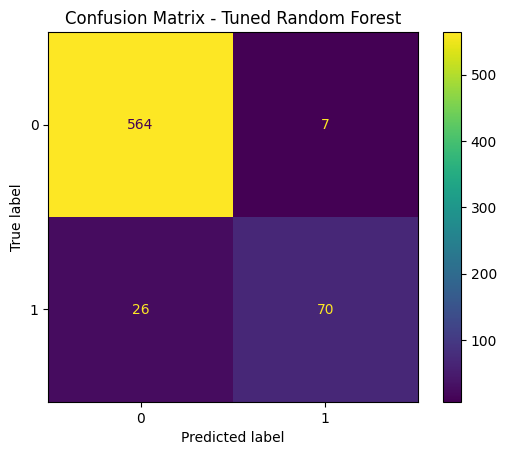

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator (best_rf, X_test, y_test)
plt.title ("Confusion Matrix - Tuned Random Forest")
plt.show()

564 (Top-left):

    True Negatives (TN): Model correctly predicted class 0 (negative)

    Meaning: 564 times, actual label was 0, and model also predicted 0.

7 (Top-right):

    False Positives (FP): Model incorrectly predicted 1 instead of actual 0

    Meaning: 7 times, actual label was 0, but model predicted 1.

26 (Bottom-left):

    False Negatives (FN): Model incorrectly predicted 0 instead of actual 1

    Meaning: 26 times, actual label was 1, but model predicted 0.

70 (Bottom-right):

    True Positives (TP): Model correctly predicted class 1 (positive)

    Meaning: 70 times, actual label was 1, and model also predicted 1.

Random Forest model is very good at predicting both classes, especially class 0.

It rarely mistakes class 0 for class 1 (only 7 times).

It makes slightly more mistakes by missing class 1 (predicts 0 instead, 26 times), but correctly finds 70 positives.

**The majority of predictions are correct** (564 + 70 = **634** correct out of 667 total).

In [9]:
# Convert X_test back to a DataFrame if it isn't already (usually it is)
X_test_df = X_test.copy()

# Add true labels and predictions as new columns
X_test_df['True Churn'] = y_test.values
X_test_df['Predicted Churn'] = y_pred

# Print the first few rows to see predictions with original data
print(X_test_df.head())

# If you want, save it to a CSV file to inspect later
X_test_df.to_csv('churn_predictions_with_original.csv', index=False)


      State  Account length  Area code  International plan  Voice mail plan  \
438      39       -0.905784  -0.523603                   0                1   
2007      3        0.927644  -0.523603                   0                0   
678      11        1.706223  -0.523603                   0                0   
1290     27        1.203914   1.718817                   0                0   
1481     25       -0.001628  -0.688834                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
438                1.527146           0.655994         1.423515   
2007              -0.591760          -1.692553         0.576314   
678               -0.591760          -0.010560         0.526479   
1290              -0.591760           0.505422         0.725820   
1481              -0.591760           1.087509         2.769070   

      Total day charge  Total eve minutes  ...  Total eve charge  \
438           0.656477          -0.770721  ...        